In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

#Download github repo


In [3]:
!git clone https://github.com/nhvd3500111/ditto

Cloning into 'ditto'...
remote: Enumerating objects: 842, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 842 (delta 11), reused 0 (delta 0), pack-reused 819
Receiving objects: 100% (842/842), 29.17 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (479/479), done.
Checking out files: 100% (137/137), done.


After having completed my experiments, I have saved the respective xlsx files with the results in the directory "results" of the repo



In [4]:
%cd /content/ditto/results/


/content/ditto/results


Let's start with the results produced in Google colab's notebooks, that is the training sessions with fp16 optimization (mixed precision) on



#Datasets with FP16 Optimization


In [5]:
final_with_fp=pd.read_excel('FINAL_F1_SCORES_FP16.xlsx')
final_with_fp

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
0,Structured/iTunes-Amazon,0,gru,0.9615,da: drop_col - dk: None - summarize: False,FP-16,roberta,112.15
1,Structured/iTunes-Amazon,0,linear,0.9412,da: drop_col - dk: None - summarize: False,FP-16,roberta,98.26
2,Structured/iTunes-Amazon,0,cls_sep,0.9454,da: drop_col - dk: None - summarize: False,FP-16,roberta,115.46
3,Structured/iTunes-Amazon,0,lstm,0.9615,da: drop_col - dk: None - summarize: False,FP-16,roberta,102.12
4,Structured/iTunes-Amazon,0,cls_sep_gru,0.8710,da: drop_col - dk: None - summarize: False,FP-16,roberta,104.21
5,Structured/iTunes-Amazon,3,gru,0.9630,da: drop_col - dk: None - summarize: False,FP-16,distilbert,100.08
6,Structured/iTunes-Amazon,3,linear,0.9259,da: drop_col - dk: None - summarize: False,FP-16,distilbert,82.60
7,Structured/iTunes-Amazon,3,cls_sep,0.9455,da: drop_col - dk: None - summarize: False,FP-16,distilbert,95.46
8,Structured/iTunes-Amazon,3,lstm,0.5938,da: drop_col - dk: None - summarize: False,FP-16,distilbert,76.93
9,Structured/iTunes-Amazon,3,cls_sep_gru,0.9123,da: drop_col - dk: None - summarize: False,FP-16,distilbert,94.04


In [15]:
#Function for depicting a plot, saving it as filename=file in the working directory and then downloading the plot to your local pc.
# It is customized for the experiments that I conducted whose results are displayed above. 
#all_2 will be a DF that will be updated every time before using this function

def figuring (file):
    x_axis=['DA = append_col','DA = drop_col']
    y_axis=np.array([all_2['F1_Testset'][i:i+2] for i in range(0,9,2)])
    models=[all_2['Model_Architecture'].iloc[i]+' (original DITTO)' if all_2['Model_Architecture'].iloc[i]=='linear' else all_2['Model_Architecture'].iloc[i]   for i in range(0,9,2)]

    plt.figure(figsize=(17,16))
    plt.plot(x_axis, y_axis[0],marker="o",ms=18)
    plt.plot(x_axis, y_axis[1],marker="P",ms=18)
    plt.plot(x_axis, y_axis[2],marker="D",ms=18)
    plt.plot(x_axis, y_axis[3],marker="s",ms=18)
    plt.plot(x_axis, y_axis[4],marker="^",ms=18)
    plt.grid(True)
    plt.xlabel('DA used', fontsize=30)
    plt.xticks(fontsize=27)
    plt.ylabel('Avg F1_Score', fontsize=30)
    plt.yticks(fontsize=27)
    plt.legend(models, fontsize=30)
    plt.savefig(file)
    files.download(file)
    plt.show()

##Structured/iTunes-Amazon


In [9]:
structured_iTunes_amazon=final_with_fp[final_with_fp.Dataset=='Structured/iTunes-Amazon']
structured_iTunes_amazon


,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
0,Structured/iTunes-Amazon,0,gru,0.9615,da: drop_col - dk: None - summarize: False,FP-16,roberta,112.15
1,Structured/iTunes-Amazon,0,linear,0.9412,da: drop_col - dk: None - summarize: False,FP-16,roberta,98.26
2,Structured/iTunes-Amazon,0,cls_sep,0.9454,da: drop_col - dk: None - summarize: False,FP-16,roberta,115.46
3,Structured/iTunes-Amazon,0,lstm,0.9615,da: drop_col - dk: None - summarize: False,FP-16,roberta,102.12
4,Structured/iTunes-Amazon,0,cls_sep_gru,0.8710,da: drop_col - dk: None - summarize: False,FP-16,roberta,104.21
5,Structured/iTunes-Amazon,3,gru,0.9630,da: drop_col - dk: None - summarize: False,FP-16,distilbert,100.08
6,Structured/iTunes-Amazon,3,linear,0.9259,da: drop_col - dk: None - summarize: False,FP-16,distilbert,82.60
7,Structured/iTunes-Amazon,3,cls_sep,0.9455,da: drop_col - dk: None - summarize: False,FP-16,distilbert,95.46
8,Structured/iTunes-Amazon,3,lstm,0.5938,da: drop_col - dk: None - summarize: False,FP-16,distilbert,76.93
9,Structured/iTunes-Amazon,3,cls_sep_gru,0.9123,da: drop_col - dk: None - summarize: False,FP-16,distilbert,94.04


Let's calculate the average F1 score per model architecture



In [10]:
all=structured_iTunes_amazon.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,cls_sep,0.94800
1,gru,0.94282
2,linear,0.93758
3,cls_sep_gru,0.92366
4,lstm,0.79244


In [11]:
all.to_latex(index=False)


'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n           cls\\_sep &     0.94800 \\\\\n               gru &     0.94282 \\\\\n            linear &     0.93758 \\\\\n       cls\\_sep\\_gru &     0.92366 \\\\\n              lstm &     0.79244 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram



In [12]:
all_2=structured_iTunes_amazon.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,cls_sep,da: append_col - dk: None - summarize: False,0.963000
1,cls_sep,da: drop_col - dk: None - summarize: False,0.938000
2,cls_sep_gru,da: append_col - dk: None - summarize: False,0.945800
3,cls_sep_gru,da: drop_col - dk: None - summarize: False,0.908900
4,gru,da: append_col - dk: None - summarize: False,0.923100
5,gru,da: drop_col - dk: None - summarize: False,0.955967
6,linear,da: append_col - dk: None - summarize: False,0.937650
7,linear,da: drop_col - dk: None - summarize: False,0.937533
8,lstm,da: append_col - dk: None - summarize: False,0.807600
9,lstm,da: drop_col - dk: None - summarize: False,0.782333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

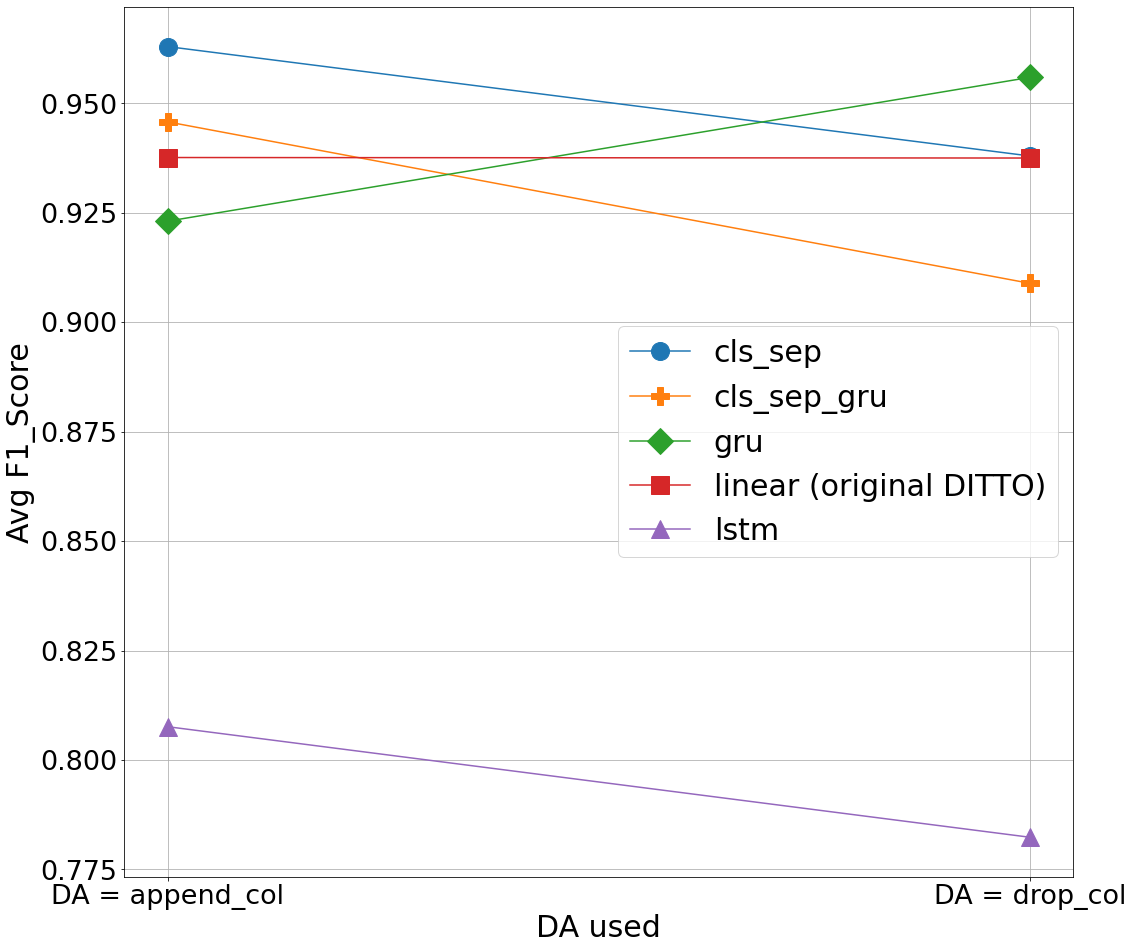

In [16]:
figuring('fig_5.png')

##Structured/Beer


In [17]:
structured_beer=final_with_fp[final_with_fp.Dataset=='Structured/Beer']
structured_beer


,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
25,Structured/Beer,3,gru,0.7059,da: drop_col - dk: None - summarize: False,FP-16,distilbert,80.50
26,Structured/Beer,3,linear,0.5926,da: drop_col - dk: None - summarize: False,FP-16,distilbert,71.16
27,Structured/Beer,3,cls_sep,0.6897,da: drop_col - dk: None - summarize: False,FP-16,distilbert,69.04
28,Structured/Beer,3,lstm,0.2667,da: drop_col - dk: None - summarize: False,FP-16,distilbert,45.48
29,Structured/Beer,3,cls_sep_gru,0.7407,da: drop_col - dk: None - summarize: False,FP-16,distilbert,76.12
30,Structured/Beer,4,gru,0.6250,da: drop_col - dk: None - summarize: False,FP-16,distilbert,129.61
31,Structured/Beer,4,linear,0.6667,da: drop_col - dk: None - summarize: False,FP-16,distilbert,142.63
32,Structured/Beer,4,cls_sep,0.6667,da: drop_col - dk: None - summarize: False,FP-16,distilbert,121.06
33,Structured/Beer,4,lstm,0.2667,da: drop_col - dk: None - summarize: False,FP-16,distilbert,45.83
34,Structured/Beer,4,cls_sep_gru,0.5263,da: drop_col - dk: None - summarize: False,FP-16,distilbert,131.90


Let's calculate the average F1 score per model architecture



In [18]:
all=structured_beer.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all


,Model_Architecture,F1_Testset
0,cls_sep,0.68265
1,gru,0.64880
2,linear,0.62385
3,cls_sep_gru,0.59495
4,lstm,0.26670


In [19]:
all.to_latex(index=False)


'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n           cls\\_sep &     0.68265 \\\\\n               gru &     0.64880 \\\\\n            linear &     0.62385 \\\\\n       cls\\_sep\\_gru &     0.59495 \\\\\n              lstm &     0.26670 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram



In [20]:
all_2=structured_beer.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,cls_sep,da: append_col - dk: None - summarize: False,0.68710
1,cls_sep,da: drop_col - dk: None - summarize: False,0.67820
2,cls_sep_gru,da: append_col - dk: None - summarize: False,0.55640
3,cls_sep_gru,da: drop_col - dk: None - summarize: False,0.63350
4,gru,da: append_col - dk: None - summarize: False,0.63215
5,gru,da: drop_col - dk: None - summarize: False,0.66545
6,linear,da: append_col - dk: None - summarize: False,0.61805
7,linear,da: drop_col - dk: None - summarize: False,0.62965
8,lstm,da: append_col - dk: None - summarize: False,0.26670
9,lstm,da: drop_col - dk: None - summarize: False,0.26670


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

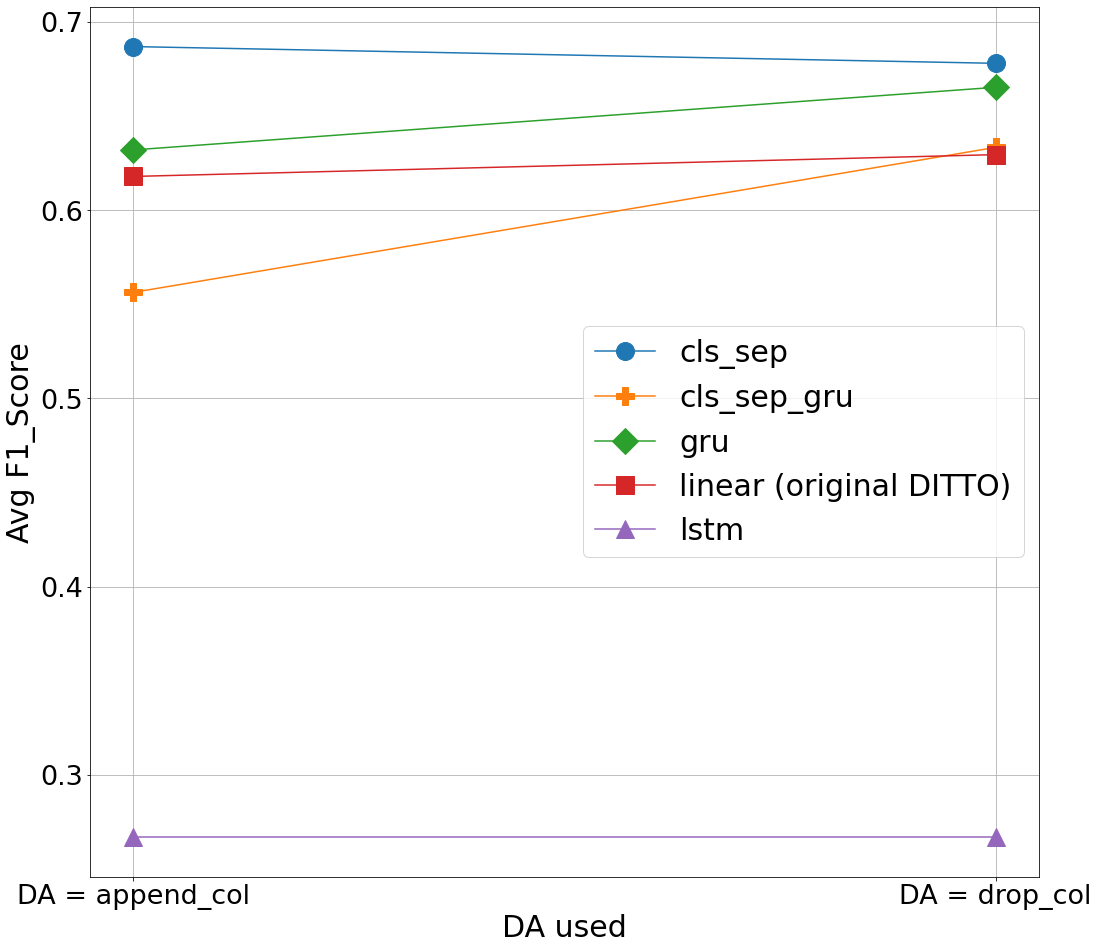

In [21]:
figuring ('fig_6.png')

##Dirty/Walmart-Amazon



In [ ]:
dirty_walmart_amazon=final_with_fp[final_with_fp.Dataset=='Dirty/Walmart-Amazon']
dirty_walmart_amazon


,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
45,Dirty/Walmart-Amazon,3,gru,0.7903,da: swap - dk: None - summarize: False,FP-16,distilbert,921.57
46,Dirty/Walmart-Amazon,3,linear,0.7676,da: swap - dk: None - summarize: False,FP-16,distilbert,920.25
47,Dirty/Walmart-Amazon,4,gru,0.8081,da: swap - dk: None - summarize: False,FP-16,distilbert,952.55
48,Dirty/Walmart-Amazon,4,linear,0.8099,da: swap - dk: None - summarize: False,FP-16,distilbert,923.24
49,Dirty/Walmart-Amazon,3,gru,0.7740,da: del - dk: None - summarize: False,FP-16,distilbert,958.66
50,Dirty/Walmart-Amazon,3,linear,0.7766,da: del - dk: None - summarize: False,FP-16,distilbert,955.50
51,Dirty/Walmart-Amazon,4,gru,0.7752,da: del - dk: None - summarize: False,FP-16,distilbert,946.98
52,Dirty/Walmart-Amazon,4,linear,0.7714,da: del - dk: None - summarize: False,FP-16,distilbert,941.50


Let's calculate the average F1 score per model architecture



In [ ]:
all=dirty_walmart_amazon.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,gru,0.786900
1,linear,0.781375


In [ ]:
all.to_latex(index=False)


'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n               gru &    0.786900 \\\\\n            linear &    0.781375 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram



In [ ]:
all_2=dirty_walmart_amazon.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,gru,da: del - dk: None - summarize: False,0.77460
1,gru,da: swap - dk: None - summarize: False,0.79920
2,linear,da: del - dk: None - summarize: False,0.77400
3,linear,da: swap - dk: None - summarize: False,0.78875


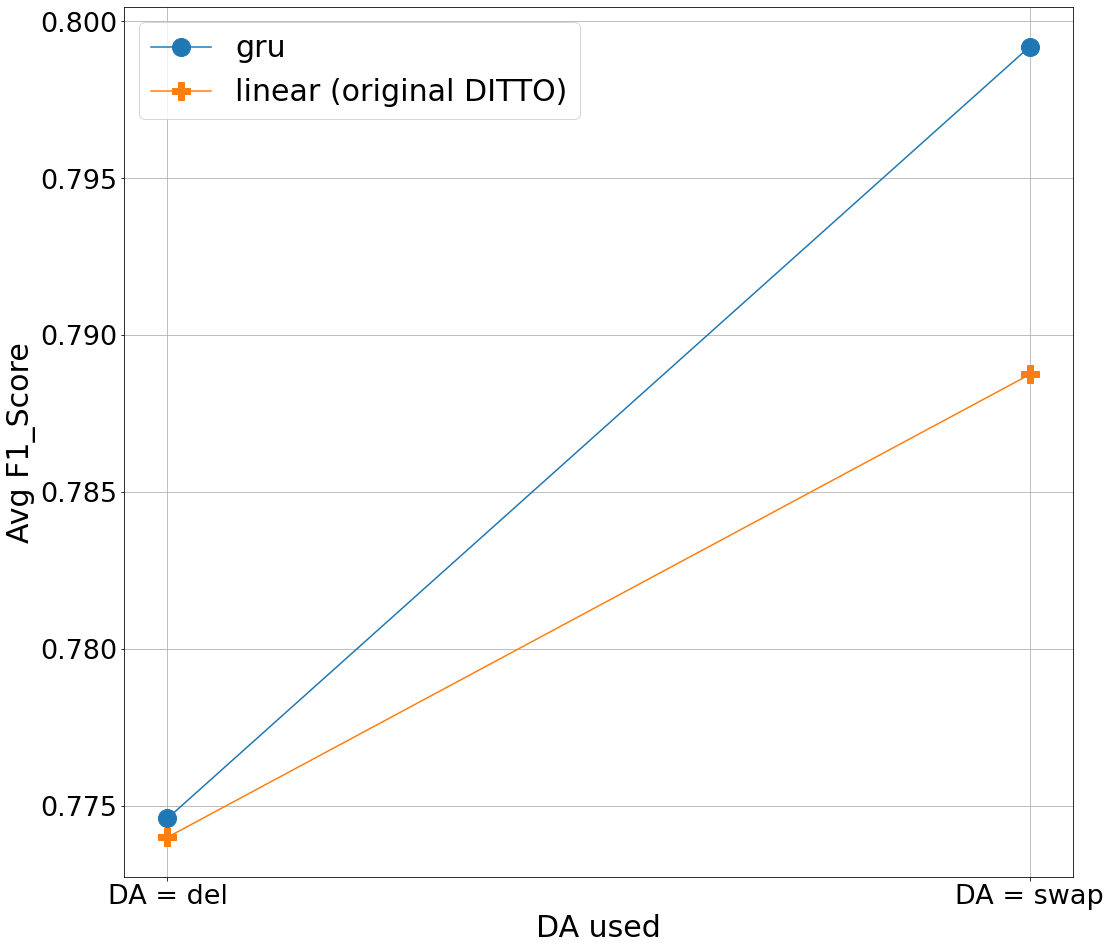

In [ ]:
# I will not use figuring function since I have less models trained for this dataset
x_axis=['DA = del','DA = swap']
y_axis=np.array([all_2['F1_Testset'][i:i+2] for i in range(0,3,2)])
models=[all_2['Model_Architecture'].iloc[i]+' (original DITTO)' if all_2['Model_Architecture'].iloc[i]=='linear' else all_2['Model_Architecture'].iloc[i]   for i in range(0,3,2)]

plt.figure(figsize=(17,16))
plt.plot(x_axis, y_axis[0],marker="o",ms=18)
plt.plot(x_axis, y_axis[1],marker="P",ms=18)
plt.grid(True)
plt.xlabel('DA used', fontsize=30)
plt.xticks(fontsize=27)
plt.ylabel('Avg F1_Score', fontsize=30)
plt.yticks(fontsize=27)
plt.legend(models, fontsize=30)
plt.savefig('fig_7.png')
files.download('fig_7.png')
plt.show()

##Let's proceed with the results produced in Kaggle's notebooks, that is the training sessions with fp16 optimization (mixed precision) on


#Datasets without FP16 Optimization

In [22]:
final_without_fp=pd.read_excel('FINAL_F1_SCORES.xlsx')
final_without_fp

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
0,wdc_cameras_small,0,gru,0.8136,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,454.78
1,wdc_cameras_small,0,linear,0.7919,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,439.88
2,wdc_cameras_small,0,cls_sep,0.7946,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,438.76
3,wdc_cameras_small,0,lstm,0.7468,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,447.95
4,wdc_cameras_small,0,cls_sep_gru,0.8126,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,451.98
...,...,...,...,...,...,...,...,...
84,wdc_computers_small,2,cls_sep_gru,0.8180,da: entry_swap - dk: product - summarize: False,FP-32,distilbert,655.47
85,wdc_all_medium,2,gru,0.8943,da: del - dk: None - summarize: False,FP-32,distilbert,4914.47
86,wdc_all_medium,2,linear,0.9018,da: del - dk: None - summarize: False,FP-32,distilbert,4862.05
87,wdc_all_medium,3,gru,0.8930,da: del - dk: None - summarize: False,FP-32,distilbert,4904.56


In [24]:
#Function for depicting a plot, saving it as filename=file in the working directory and then downloading the plot to your local pc.
# It is customized for the experiments that I conducted whose results are displayed above. 
#all_2 will be a DF that will be updated every time before using this function

def figuring_2 (file):
    x_axis=['No DK','DK=Product']
    y_axis=np.array([all_2['F1_Testset'][i:i+2] for i in range(0,9,2)])
    models=[all_2['Model_Architecture'].iloc[i]+' (original DITTO)' if all_2['Model_Architecture'].iloc[i]=='linear' else all_2['Model_Architecture'].iloc[i]   for i in range(0,9,2)]

    plt.figure(figsize=(17,16))
    plt.plot(x_axis, y_axis[0],marker="o",ms=18)
    plt.plot(x_axis, y_axis[1],marker="P",ms=18)
    plt.plot(x_axis, y_axis[2],marker="D",ms=18)
    plt.plot(x_axis, y_axis[3],marker="s",ms=18)
    plt.plot(x_axis, y_axis[4],marker="^",ms=18)
    plt.grid(True)
    plt.xlabel('DK used', fontsize=30)
    plt.xticks(fontsize=27)
    plt.ylabel('Avg F1_Score', fontsize=30)
    plt.yticks(fontsize=27)
    plt.legend(models, fontsize=30)
    plt.savefig(file)
    files.download(file)
    plt.show()


##wdc_cameras_small

In [25]:
wdc_cameras_small=final_without_fp[final_without_fp.Dataset=='wdc_cameras_small']
wdc_cameras_small


,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
0,wdc_cameras_small,0,gru,0.8136,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,454.78
1,wdc_cameras_small,0,linear,0.7919,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,439.88
2,wdc_cameras_small,0,cls_sep,0.7946,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,438.76
3,wdc_cameras_small,0,lstm,0.7468,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,447.95
4,wdc_cameras_small,0,cls_sep_gru,0.8126,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,451.98
5,wdc_cameras_small,1,gru,0.8006,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,455.15
6,wdc_cameras_small,1,linear,0.7795,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,439.19
7,wdc_cameras_small,1,cls_sep,0.7590,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,438.02
8,wdc_cameras_small,1,lstm,0.6684,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,449.01
9,wdc_cameras_small,1,cls_sep_gru,0.7837,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,451.34


Let's calculate the average F1 score per model architecture



In [26]:
all=wdc_cameras_small.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,cls_sep_gru,0.80490
1,gru,0.79842
2,linear,0.78934
3,cls_sep,0.78534
4,lstm,0.75776


In [27]:
all.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n       cls\\_sep\\_gru &     0.80490 \\\\\n               gru &     0.79842 \\\\\n            linear &     0.78934 \\\\\n           cls\\_sep &     0.78534 \\\\\n              lstm &     0.75776 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram

In [28]:
all_2=wdc_cameras_small.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,cls_sep,da: entry_swap - dk: None - summarize: False,0.776833
1,cls_sep,da: entry_swap - dk: product - summarize: False,0.798100
2,cls_sep_gru,da: entry_swap - dk: None - summarize: False,0.798767
3,cls_sep_gru,da: entry_swap - dk: product - summarize: False,0.814100
4,gru,da: entry_swap - dk: None - summarize: False,0.801533
5,gru,da: entry_swap - dk: product - summarize: False,0.793750
6,linear,da: entry_swap - dk: None - summarize: False,0.790267
7,linear,da: entry_swap - dk: product - summarize: False,0.787950
8,lstm,da: entry_swap - dk: None - summarize: False,0.727300
9,lstm,da: entry_swap - dk: product - summarize: False,0.803450


In [ ]:
figuring_2('fig_1.png')

##wdc_computers_small


In [29]:
wdc_computers_small=final_without_fp[final_without_fp.Dataset=='wdc_computers_small']
wdc_computers_small

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
65,wdc_computers_small,1,gru,0.8226,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,620.78
66,wdc_computers_small,1,linear,0.8369,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,601.16
67,wdc_computers_small,1,cls_sep,0.8079,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,606.25
68,wdc_computers_small,1,lstm,0.8102,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,621.28
69,wdc_computers_small,1,cls_sep_gru,0.7858,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,612.34
70,wdc_computers_small,2,gru,0.8273,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,617.20
71,wdc_computers_small,2,linear,0.7988,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,619.06
72,wdc_computers_small,2,cls_sep,0.8179,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,609.11
73,wdc_computers_small,2,lstm,0.8282,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,623.46
74,wdc_computers_small,2,cls_sep_gru,0.8141,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,616.82


Let's calculate the average F1 score per model architecture



In [30]:
all=wdc_computers_small.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,lstm,0.827700
1,gru,0.814250
2,linear,0.813400
3,cls_sep_gru,0.803750
4,cls_sep,0.799775


In [31]:
all.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n              lstm &    0.827700 \\\\\n               gru &    0.814250 \\\\\n            linear &    0.813400 \\\\\n       cls\\_sep\\_gru &    0.803750 \\\\\n           cls\\_sep &    0.799775 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram

In [32]:
all_2=wdc_computers_small.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,cls_sep,da: entry_swap - dk: None - summarize: False,0.81290
1,cls_sep,da: entry_swap - dk: product - summarize: False,0.78665
2,cls_sep_gru,da: entry_swap - dk: None - summarize: False,0.79995
3,cls_sep_gru,da: entry_swap - dk: product - summarize: False,0.80755
4,gru,da: entry_swap - dk: None - summarize: False,0.82495
5,gru,da: entry_swap - dk: product - summarize: False,0.80355
6,linear,da: entry_swap - dk: None - summarize: False,0.81785
7,linear,da: entry_swap - dk: product - summarize: False,0.80895
8,lstm,da: entry_swap - dk: None - summarize: False,0.81920
9,lstm,da: entry_swap - dk: product - summarize: False,0.83620


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

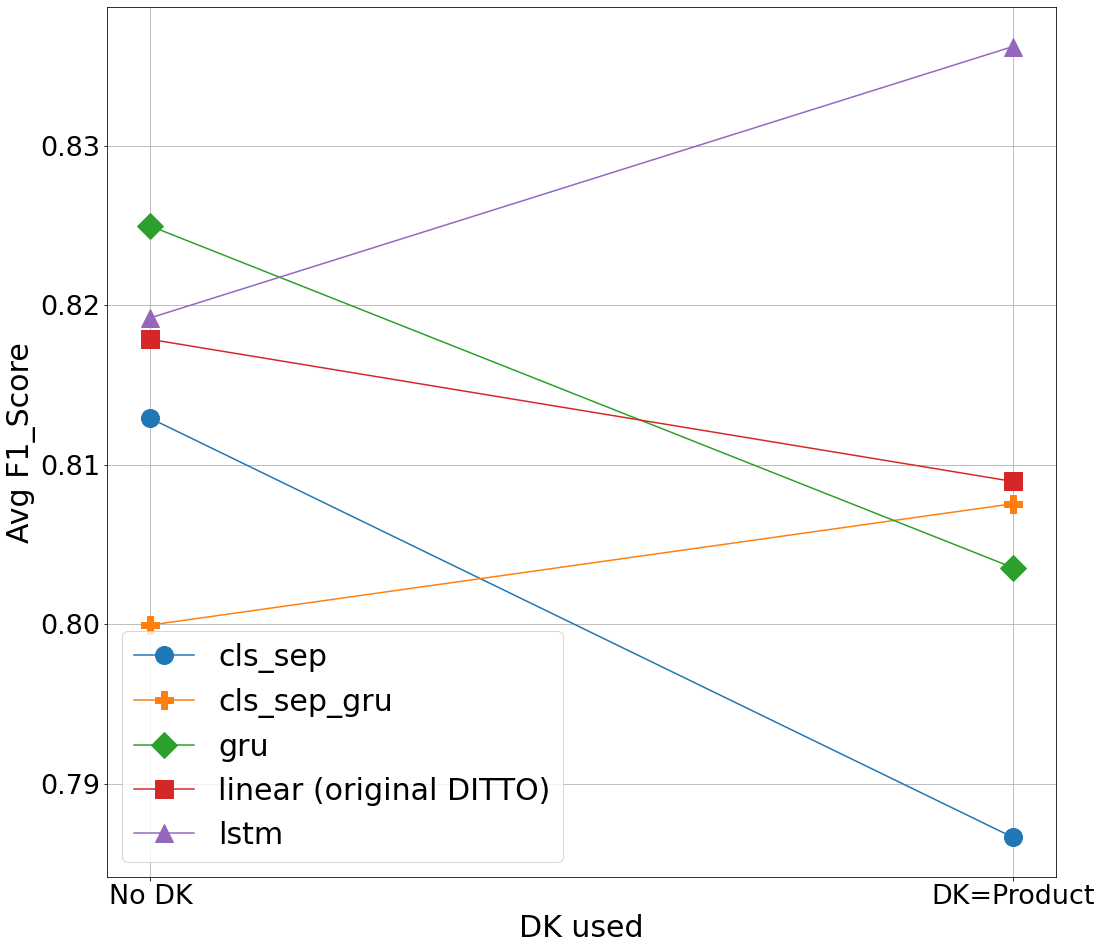

In [33]:
figuring_2('fig_1.png')

##wdc_watches_small



In [34]:
wdc_watches_small=final_without_fp[final_without_fp.Dataset=='wdc_watches_small']
wdc_watches_small

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
45,wdc_watches_small,1,gru,0.8287,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,489.09
46,wdc_watches_small,1,linear,0.8378,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,469.78
47,wdc_watches_small,1,cls_sep,0.8431,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,477.51
48,wdc_watches_small,1,lstm,0.8734,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,477.25
49,wdc_watches_small,1,cls_sep_gru,0.8801,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,477.28
50,wdc_watches_small,2,gru,0.8590,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,477.20
51,wdc_watches_small,2,linear,0.8048,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,472.29
52,wdc_watches_small,2,cls_sep,0.8019,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,466.56
53,wdc_watches_small,2,lstm,0.8657,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,486.06
54,wdc_watches_small,2,cls_sep_gru,0.8233,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,471.04


Let's calculate the average F1 score per model architecture



In [35]:
all=wdc_watches_small.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,gru,0.856125
1,lstm,0.849500
2,cls_sep,0.838900
3,cls_sep_gru,0.836900
4,linear,0.832975


In [36]:
all.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n               gru &    0.856125 \\\\\n              lstm &    0.849500 \\\\\n           cls\\_sep &    0.838900 \\\\\n       cls\\_sep\\_gru &    0.836900 \\\\\n            linear &    0.832975 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram

In [37]:
all_2=wdc_watches_small.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,cls_sep,da: entry_swap - dk: None - summarize: False,0.82250
1,cls_sep,da: entry_swap - dk: product - summarize: False,0.85530
2,cls_sep_gru,da: entry_swap - dk: None - summarize: False,0.85170
3,cls_sep_gru,da: entry_swap - dk: product - summarize: False,0.82210
4,gru,da: entry_swap - dk: None - summarize: False,0.84385
5,gru,da: entry_swap - dk: product - summarize: False,0.86840
6,linear,da: entry_swap - dk: None - summarize: False,0.82130
7,linear,da: entry_swap - dk: product - summarize: False,0.84465
8,lstm,da: entry_swap - dk: None - summarize: False,0.86955
9,lstm,da: entry_swap - dk: product - summarize: False,0.82945


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

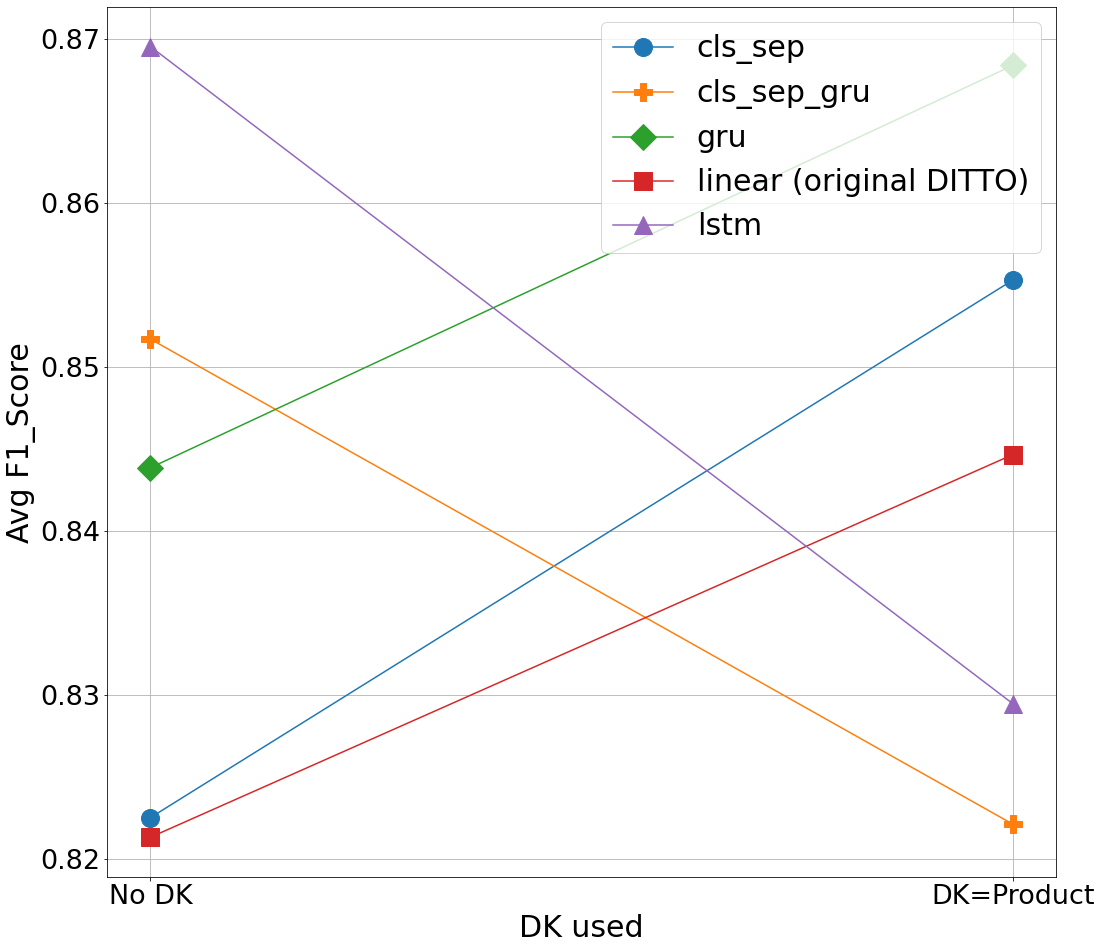

In [38]:
figuring_2('fig_3.png')

##wdc_shoes_small




In [39]:
wdc_shoes_small=final_without_fp[final_without_fp.Dataset=='wdc_shoes_small']
wdc_shoes_small

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
25,wdc_shoes_small,1,gru,0.7838,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,446.91
26,wdc_shoes_small,1,linear,0.7633,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,430.95
27,wdc_shoes_small,1,cls_sep,0.7299,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,433.09
28,wdc_shoes_small,1,lstm,0.7458,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,440.77
29,wdc_shoes_small,1,cls_sep_gru,0.7539,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,443.10
30,wdc_shoes_small,2,gru,0.7583,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,442.05
31,wdc_shoes_small,2,linear,0.7382,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,429.28
32,wdc_shoes_small,2,cls_sep,0.7548,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,437.98
33,wdc_shoes_small,2,lstm,0.7411,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,443.44
34,wdc_shoes_small,2,cls_sep_gru,0.7578,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,435.80


Let's calculate the average F1 score per model architecture



In [40]:
all=wdc_shoes_small.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,cls_sep_gru,0.76300
1,gru,0.75125
2,cls_sep,0.74750
3,linear,0.74070
4,lstm,0.74070


In [41]:
all.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n       cls\\_sep\\_gru &     0.76300 \\\\\n               gru &     0.75125 \\\\\n           cls\\_sep &     0.74750 \\\\\n            linear &     0.74070 \\\\\n              lstm &     0.74070 \\\\\n\\bottomrule\n\\end{tabular}\n'

Now let's calculate the mean value of all runs constrained to the same model and the same parameters and create the respective diagram

In [42]:
all_2=wdc_shoes_small.groupby(by=['Model_Architecture','Optimizations'])['F1_Testset'].mean()
all_2=all_2.reset_index()
all_2=all_2.sort_values(['Model_Architecture'])
all_2

,Model_Architecture,Optimizations,F1_Testset
0,cls_sep,da: entry_swap - dk: None - summarize: False,0.74235
1,cls_sep,da: entry_swap - dk: product - summarize: False,0.75265
2,cls_sep_gru,da: entry_swap - dk: None - summarize: False,0.75585
3,cls_sep_gru,da: entry_swap - dk: product - summarize: False,0.77015
4,gru,da: entry_swap - dk: None - summarize: False,0.77105
5,gru,da: entry_swap - dk: product - summarize: False,0.73145
6,linear,da: entry_swap - dk: None - summarize: False,0.75075
7,linear,da: entry_swap - dk: product - summarize: False,0.73065
8,lstm,da: entry_swap - dk: None - summarize: False,0.74345
9,lstm,da: entry_swap - dk: product - summarize: False,0.73795


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

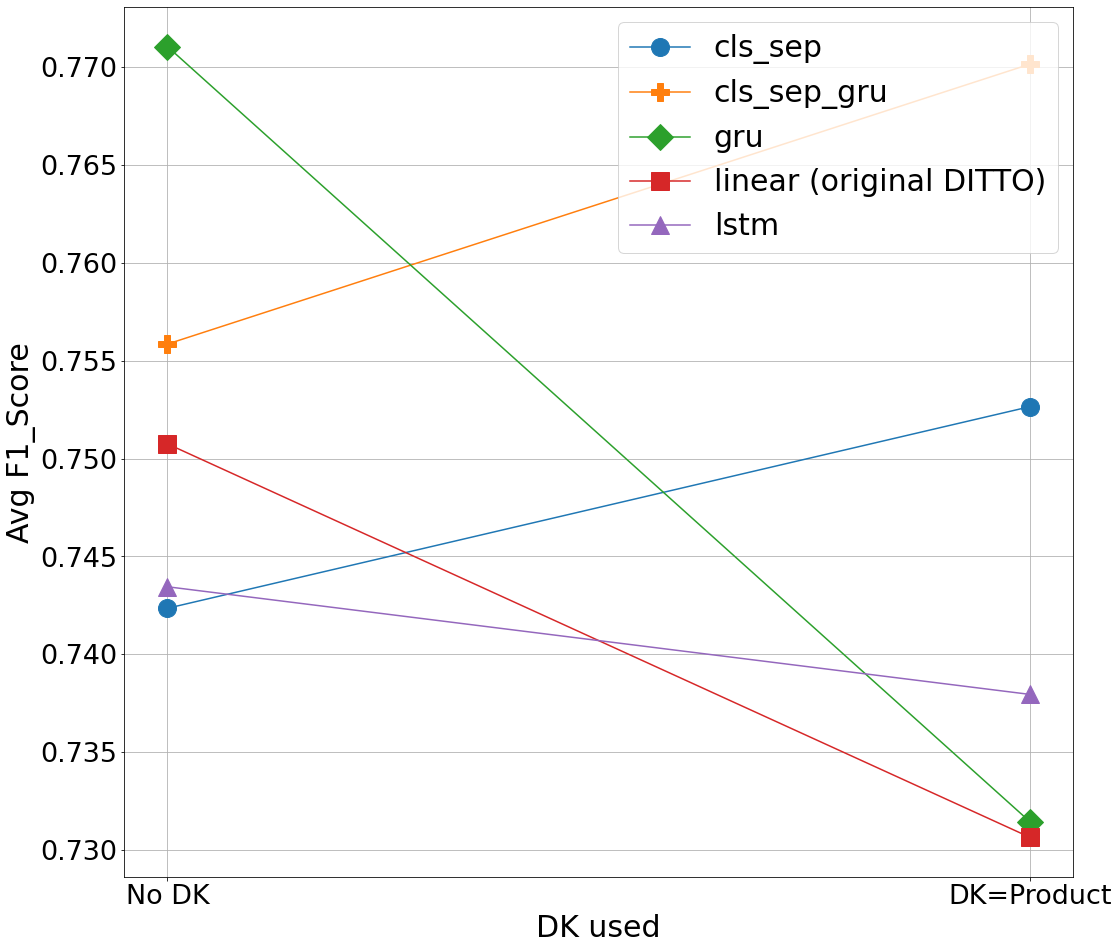

In [44]:
figuring_2('fig_4.png')

##wdc_all_medium




In [ ]:
wdc_all_medium=final_without_fp[final_without_fp.Dataset=='wdc_all_medium']
wdc_all_medium

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
85,wdc_all_medium,2,gru,0.8943,da: del - dk: None - summarize: False,FP-32,distilbert,4914.47
86,wdc_all_medium,2,linear,0.9018,da: del - dk: None - summarize: False,FP-32,distilbert,4862.05
87,wdc_all_medium,3,gru,0.8930,da: del - dk: None - summarize: False,FP-32,distilbert,4904.56
88,wdc_all_medium,3,linear,0.8836,da: del - dk: None - summarize: False,FP-32,distilbert,4878.38


Let's calculate the average F1 score per model architecture



In [ ]:
all=wdc_all_medium.groupby(by='Model_Architecture').mean()['F1_Testset'].sort_values(ascending=False).to_frame()
all=all.reset_index()
all

,Model_Architecture,F1_Testset
0,gru,0.89365
1,linear,0.89270


In [ ]:
all.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\nModel\\_Architecture &  F1\\_Testset \\\\\n\\midrule\n               gru &     0.89365 \\\\\n            linear &     0.89270 \\\\\n\\bottomrule\n\\end{tabular}\n'

#Time Required


I will merge final_without_fp and final_with_fp Dataframes, in order to present a universal approximation regarding the time consumed during training sessions.



In [ ]:
universal=final_without_fp.append(final_with_fp)
universal

,Dataset,Run_id,Model_Architecture,F1_Testset,Optimizations,FP,LM,Train_time
0,wdc_cameras_small,0,gru,0.8136,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,454.78
1,wdc_cameras_small,0,linear,0.7919,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,439.88
2,wdc_cameras_small,0,cls_sep,0.7946,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,438.76
3,wdc_cameras_small,0,lstm,0.7468,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,447.95
4,wdc_cameras_small,0,cls_sep_gru,0.8126,da: entry_swap - dk: None - summarize: False,FP-32,distilbert,451.98
...,...,...,...,...,...,...,...,...
48,Dirty/Walmart-Amazon,4,linear,0.8099,da: swap - dk: None - summarize: False,FP-16,distilbert,923.24
49,Dirty/Walmart-Amazon,3,gru,0.7740,da: del - dk: None - summarize: False,FP-16,distilbert,958.66
50,Dirty/Walmart-Amazon,3,linear,0.7766,da: del - dk: None - summarize: False,FP-16,distilbert,955.50
51,Dirty/Walmart-Amazon,4,gru,0.7752,da: del - dk: None - summarize: False,FP-16,distilbert,946.98


In [ ]:
total_time=universal.groupby('Model_Architecture').sum()['Train_time']
total_time=total_time.reset_index()
total_time

,Model_Architecture,Train_time
0,cls_sep,9518.75
1,cls_sep_gru,9535.92
2,gru,23458.15
3,linear,22870.40
4,lstm,9260.79
